In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# %config InlineBackend.figure_format = 'retina'
# !apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=12)

plt.rc('font', family='NanumBarunGothic') 
# mpl.font_manager._rebuild()

In [3]:
def draw_bar(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(18,6))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    
    plt.bar(x, y)
    plt.show()

## 데이터 프레임

In [4]:
data_path = os.path.join("..", "data", "Original")
data_df = pd.read_csv(os.path.join(data_path, "train.tsv"), sep="\t", header=None)
data_df

,0,1,2,3,4,5,6,7,8
0,wikipedia-24896-25-30-33-19-21,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,30,33,자동차,19,21,단체:제작
1,wikipedia-12728-224-5-7-42-44,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,5,7,27석,42,44,관계_없음
2,wikipedia-28460-3-0-7-9-12,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,0,7,UEFA,9,12,단체:별칭
3,wikipedia-11479-37-24-26-3-5,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,24,26,공격수,3,5,인물:직업/직함
4,wikipedia-15581-6-0-2-32-40,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,0,2,퍼쿤 씨 인트라팃,32,40,인물:부모님
...,...,...,...,...,...,...,...,...,...
8995,wikipedia-5414-12-15-21-0-4,2002년 FIFA 월드컵 사우디아라비아와의 1차전에서 독일은 8-0으로 승리하였는...,사우디아라비아,15,21,2002년,0,4,관계_없음
8996,wikipedia-10384-4-12-14-0-1,일본의 2대 메이커인 토요타와 닛산은 시장 점유율을 높이기 위한 신차 개발을 계속하...,토요타,12,14,일본,0,1,단체:본사_국가
8997,wikipedia-25913-6-8-10-93-106,방호의의 손자 방덕룡(方德龍)은 1588년(선조 21년) 무과에 급제하고 낙안군수로...,방덕룡,8,10,선무원종공신(宣武原從功臣),93,106,인물:직업/직함
8998,wikitree-12062-15-0-3-46-47,LG전자는 올해 초 국내시장에 출시한 2020년형 ‘LG 그램’ 시리즈를 이달부터 ...,LG전자,0,3,북미,46,47,관계_없음


## 전체 라벨 훑어보기

===== Counts =====
관계_없음 : 4432
단체:구성원 : 815
인물:소속단체 : 683
인물:직업/직함 : 553
단체:상위_단체 : 335
단체:별칭 : 231
인물:출신성분/국적 : 209
인물:동료 : 186
단체:제작 : 171
인물:부모님 : 164
단체:본사_도시 : 135
단체:본사_국가 : 115
인물:별칭 : 103
인물:배우자 : 92
인물:자녀 : 84
단체:하위_단체 : 79
단체:창립일 : 67
인물:기타_친족 : 58
인물:제작 : 56
인물:형제/자매/남매 : 52
단체:창립자 : 45
인물:사망_일시 : 45
단체:모회사 : 44
인물:출생_일시 : 36
인물:거주_국가 : 27
인물:거주_도시 : 26
단체:본사_주(도) : 23
단체:정치/종교성향 : 18
인물:종교 : 15
단체:해산일 : 15
인물:거주_주(도) : 12
단체:주주 : 11
인물:용의자 : 11
단체:구성원_수 : 9
인물:학교 : 9
인물:출생_국가 : 8
인물:사망_원인 : 7
단체:자회사 : 6
인물:나이 : 5
인물:출생_도시 : 4
인물:사망_도시 : 3
인물:사망_국가 : 1
===== describes =====
전체 라벨 개수 : 42
최대값 : 4432
최소값 : 1
평균 : 214.28571428571428


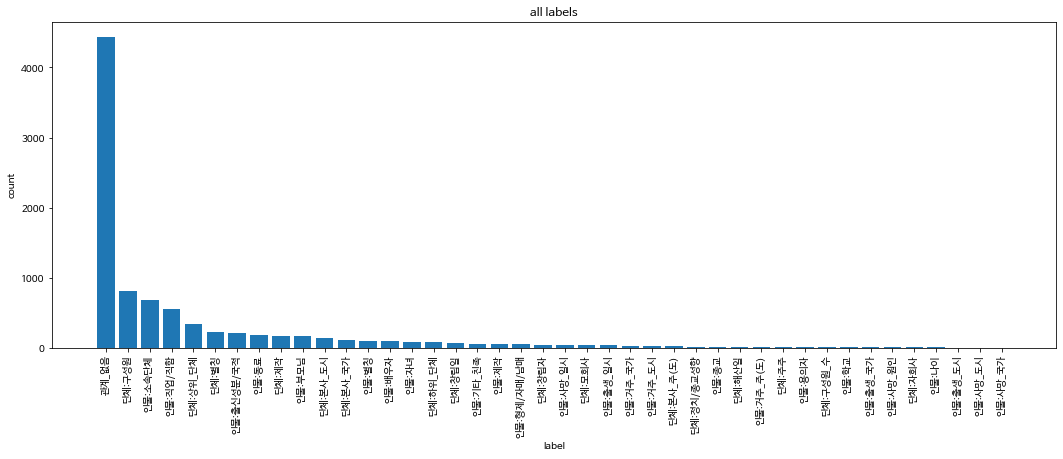

In [5]:
class_count = dict(data_df[8].value_counts())

print("===== Counts =====")
for k, v in class_count.items():
    print(f"{k:} : {v}")

print("===== describes =====")
class_values = list(class_count.values())
print(f"전체 라벨 개수 : {len(class_values)}")
print(f"최대값 : {np.max(class_values)}")
print(f"최소값 : {np.min(class_values)}")
print(f"평균 : {np.mean(class_values)}")
     
draw_bar(class_count.keys(), class_count.values(), "label", "count", "all labels")

## 인물 라벨만 훑어보기

===== Counts =====
인물:소속단체 : 683
인물:직업/직함 : 553
인물:출신성분/국적 : 209
인물:동료 : 186
인물:부모님 : 164
인물:별칭 : 103
인물:배우자 : 92
인물:자녀 : 84
인물:기타_친족 : 58
인물:제작 : 56
인물:형제/자매/남매 : 52
인물:사망_일시 : 45
인물:출생_일시 : 36
인물:거주_국가 : 27
인물:거주_도시 : 26
인물:종교 : 15
인물:거주_주(도) : 12
인물:용의자 : 11
인물:학교 : 9
인물:출생_국가 : 8
인물:사망_원인 : 7
인물:나이 : 5
인물:출생_도시 : 4
인물:사망_도시 : 3
인물:사망_국가 : 1
===== describes =====
인물 라벨 개수 : 25
인물 데이터 개수 : 2449
인물 데이터 비율 : 27.2%
최대값 : 683
최소값 : 1
평균 : 97.96


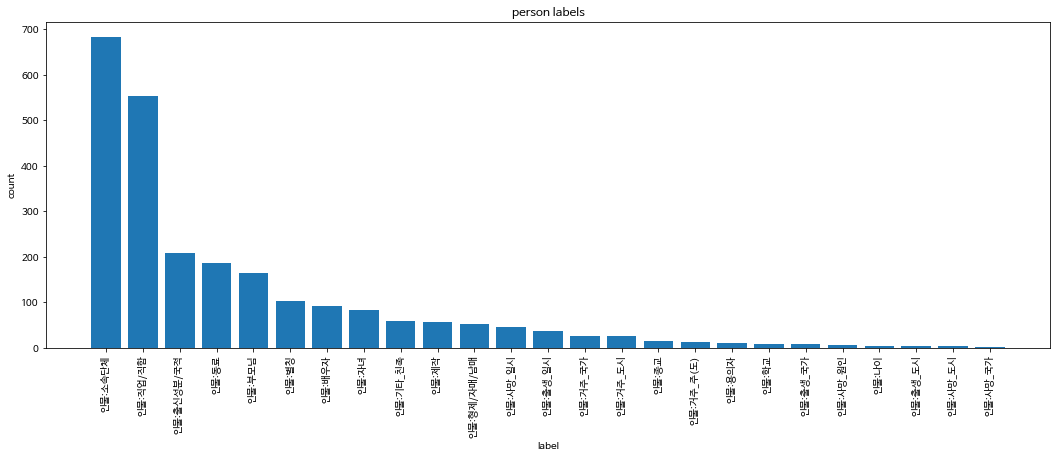

In [6]:
person_count = {k: v for k, v in class_count.items() if k[:2] == "인물"}

print("===== Counts =====")
for k, v in person_count.items():
    print(f"{k:} : {v}")
        
print("===== describes =====")
person_values = list(person_count.values())
print(f"인물 라벨 개수 : {len(person_values)}")
print(f"인물 데이터 개수 : {sum(person_values)}")
print(f"인물 데이터 비율 : {sum(person_values) / sum(class_values) * 100:.1f}%")
print(f"최대값 : {np.max(person_values)}")
print(f"최소값 : {np.min(person_values)}")
print(f"평균 : {np.mean(person_values)}")
        
draw_bar(person_count.keys(), person_count.values(), "label", "count", "person labels")

===== Counts =====
단체:구성원 : 815
단체:상위_단체 : 335
단체:별칭 : 231
단체:제작 : 171
단체:본사_도시 : 135
단체:본사_국가 : 115
단체:하위_단체 : 79
단체:창립일 : 67
단체:창립자 : 45
단체:모회사 : 44
단체:본사_주(도) : 23
단체:정치/종교성향 : 18
단체:해산일 : 15
단체:주주 : 11
단체:구성원_수 : 9
단체:자회사 : 6
===== describes =====
단체 라벨 개수 : 16
단체 데이터 개수 : 2119
단체 데이터 비율 : 23.5%
최대값 : 815
최소값 : 6
평균 : 132.4375


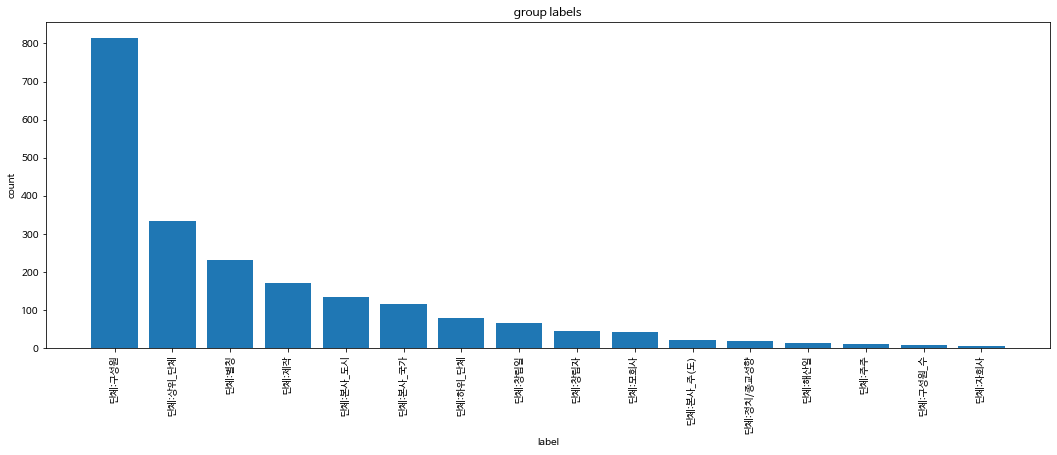

In [7]:
group_count = {k: v for k, v in class_count.items() if k[:2] == "단체"}

print("===== Counts =====")
for k, v in group_count.items():
    print(f"{k:} : {v}")
        
print("===== describes =====")
group_values = list(group_count.values())
print(f"단체 라벨 개수 : {len(group_values)}")
print(f"단체 데이터 개수 : {sum(group_values)}")
print(f"단체 데이터 비율 : {sum(group_values) / sum(class_values) * 100:.1f}%")
print(f"최대값 : {np.max(group_values)}")
print(f"최소값 : {np.min(group_values)}")
print(f"평균 : {np.mean(group_values)}")
        
draw_bar(group_count.keys(), group_count.values(), "label", "count", "group labels")

## 한글이 아닌 개체명 존재 여부

### 한글로만 구성되어 있지 않는 개체명들

In [19]:
for row in data_df.iloc[1, :]:
    print(row)
    break

wikipedia-12728-224-5-7-42-44


In [34]:
cond = r"[가-힣]"
count = 0

print("===== All none korean entities =====")
for idx, (e1, e2, sentence, relation) in enumerate(zip(data_df[2], data_df[5], data_df[1], data_df[8])):
    if re.match(cond, e1) is None or re.match(cond, e2) is None:
        print(f"[{idx}] - [{e1}] - [{e2}] - [{relation}]")
        count += 1
        
print("===== info =====")
print(f"count : {count}")

===== All none korean entities =====
[1] - [민주당] - [27석] - [관계_없음]
[2] - [유럽 축구 연맹] - [UEFA] - [단체:별칭]
[5] - [OIE] - [전문가] - [관계_없음]
[6] - [기아자동차] - [K5] - [단체:제작]
[9] - [삼성SDS] - [10%] - [관계_없음]
[25] - [인천시] - [7기] - [관계_없음]
[27] - [방탄소년단] - [HOUSE OF BTS] - [관계_없음]
[31] - [LG전자] - [4분기] - [관계_없음]
[37] - [원상] - [袁譚] - [관계_없음]
[40] - [프랑스군] - [1914년] - [관계_없음]
[42] - [UBS] - [스위스] - [관계_없음]
[43] - [MBC] - [문화방송] - [단체:별칭]
[44] - [김대중] - [1987년] - [관계_없음]
[52] - [신나라] - [23년] - [관계_없음]
[56] - [MBC경남 진주본부] - [문화방송] - [단체:상위_단체]
[67] - [말러] - [2부] - [관계_없음]
[74] - [광주대] - [117억 원] - [관계_없음]
[78] - [이상훈] - [1990년] - [관계_없음]
[81] - [광양시] - [100여 명] - [관계_없음]
[87] - [GS홈쇼핑] - [연구원] - [관계_없음]
[88] - [NASA] - [과학자] - [단체:구성원]
[94] - [SPC그룹] - [허영인] - [단체:구성원]
[98] - [전기 전자 기술자 협회] - [IEEE] - [단체:별칭]
[100] - [메리다] - [999] - [관계_없음]
[108] - [KT] - [주주] - [단체:주주]
[114] - [Marie] - [프랑스] - [인물:거주_국가]
[121] - [이] - [1000명] - [관계_없음]
[126] - [문희준] - [H.O.T.] - [인물:소속단체]
[127] - [국제축구연맹] - [FIFA] - [

### 영문, 숫자, 한글이 이외의 문자가 포함된 개체명들

In [33]:
cond = r"[a-zA-Z가-힣0-9]"
count = 0

print("===== All none korean entities =====")
for idx, (e1, e2, sentence, relation) in enumerate(zip(data_df[2], data_df[5], data_df[1], data_df[8])):
    if re.match(cond, e1) is None or re.match(cond, e2) is None:
        print(f"[{idx}] - [{e1}] - [{e2}] - [{relation}]")
        count += 1
        
print("===== info =====")
print(f"count : {count}")

===== All none korean entities =====
[37] - [원상] - [袁譚] - [관계_없음]
[183] - [티몬과 품바] - [《라이온 킹》] - [관계_없음]
[230] - [慶應] - [게이오] - [단체:별칭]
[335] - [黃皓] - [황호] - [인물:별칭]
[374] - [최승훈] - [㈜빵굽는사람들] - [인물:소속단체]
[595] - [이승만] - [李承萬] - [인물:별칭]
[955] - [☎] - [무안군] - [관계_없음]
[1026] - [㈜로우카본테크] - [강진군] - [단체:본사_도시]
[1084] - [㈜진성퍼니처] - [대표] - [단체:구성원]
[1197] - [帶原君] - [대원군] - [단체:별칭]
[1392] - [金] - [대한민국] - [관계_없음]
[1559] - [모리 요시로] - [森 喜朗] - [인물:별칭]
[1577] - [송] - [宋] - [단체:별칭]
[1735] - [(사)광주민주화운동기념사업회] - [이사장] - [단체:구성원]
[1742] - [中宗] - [중종] - [인물:별칭]
[1753] - [㈜호원] - [㈜드림씨엔지] - [관계_없음]
[1906] - [㈜광주글로벌모터스] - [지난해] - [관계_없음]
[2021] - [호조씨] - [北条氏] - [단체:별칭]
[2993] - [㈜거명이앤씨] - [반재경] - [단체:구성원]
[3066] - [(사)한국드론산업협회] - [드론] - [관계_없음]
[3326] - [㈜] - [대표] - [관계_없음]
[3394] - [백월서운] - [空大師] - [관계_없음]
[3681] - [李集] - [이집] - [인물:별칭]
[3765] - [울산방송] - [蔚山放送] - [단체:별칭]
[3926] - [오토 타치바나] - [《소년 메이드》] - [인물:제작]
[4050] - [(재)전라남도환경산업진흥원] - [원장] - [단체:구성원]
[4309] - [李址鎔] - [이지용] - [인물:별칭]
[4500] - [이재영] -